In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv').dropna()
df = pd.DataFrame(data)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


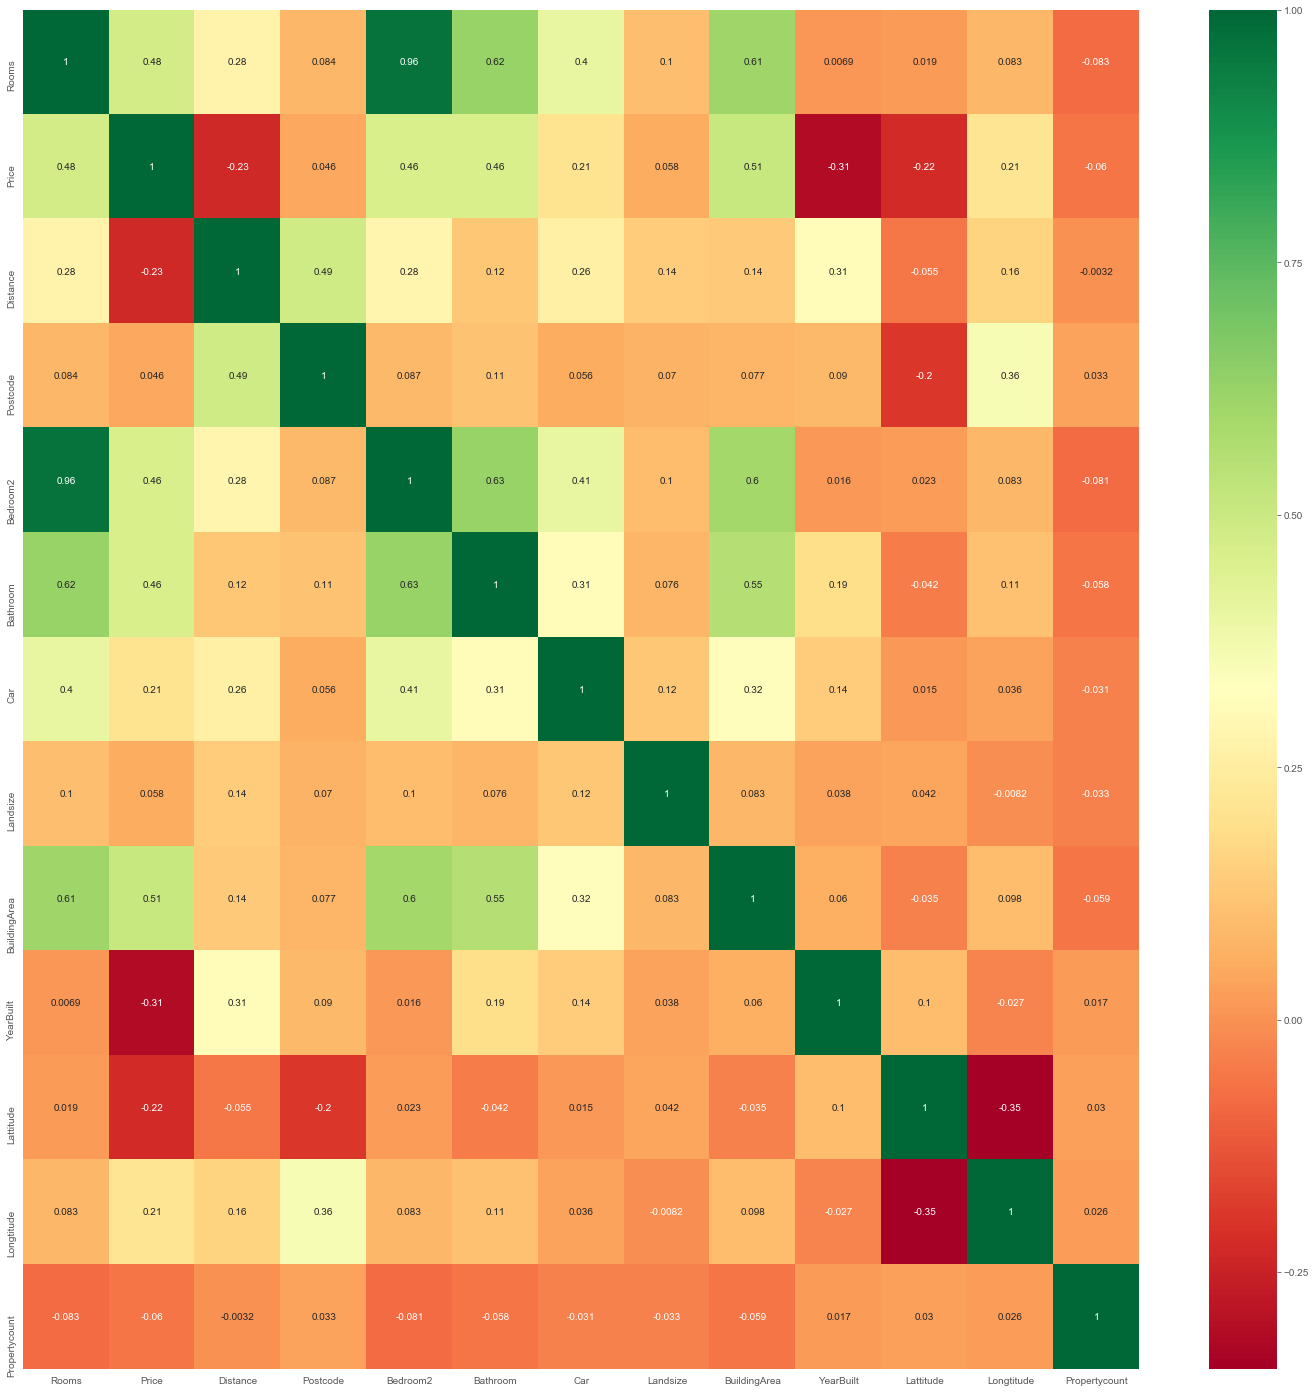

In [3]:
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [4]:
df.Suburb.nunique()

315

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


### Standardize all the data
Dont need Long/Lat 

Keep Suburb! Remove postcode, regionname, councilarea, address, SellerG, Date
Start with LinearRegression / RandomForest

In [7]:
dfo = df.drop(['Address','SellerG','Postcode','CouncilArea','Lattitude', 'Longtitude', 'Regionname', 'Date'], axis=1)

In [8]:
dfo = dfo.reset_index(drop=True)

In [9]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 13 columns):
Suburb           8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
Distance         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
Propertycount    8887 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 902.7+ KB


In [10]:
df1 = pd.get_dummies(dfo, prefix=['Address', 'Type', 'Method'])

In [11]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Price'], axis=1) #training features
y = df1.Price #target

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .1)

In [12]:
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print('Training accuracy normal LinearRegression is: {}'.format(regr1.score(x_train, y_train)))
print('Test accuracy normal LinearRegression is: {}'.format(regr1.score(x_test, y_test)))

Training accuracy normal LinearRegression is: 0.7282326405205717
Test accuracy normal LinearRegression is: 0.6817830105803383


In [14]:
y_pred = regr1.predict(x_train)
y_predtest = regr1.predict(x_test)

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr1, x_train, y_train, cv=15)
print("Cross Val Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Val Accuracy: 0.71 (+/- 0.09)


In [16]:
from sklearn.metrics import r2_score

print(r2_score(y_train, y_pred))

0.7282326405205717


### Forest
Now that we have tried basic linear regression and seen accuracy at around 70%
Let's try random forest regressor and see if that fits our data better

In [17]:
from sklearn import ensemble

rfr = ensemble.RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
print('Training accuracy normal RandomForest is: {}'.format(rfr.score(x_train, y_train)))
print('Test accuracy normal RandomForest is: {}'.format(rfr.score(x_test, y_test)))

Training accuracy normal RandomForest is: 0.9542621821839479
Test accuracy normal RandomForest is: 0.7800268560010832


In [19]:
scores = cross_val_score(rfr, x_train, y_train, cv=5)
print("Cross Val Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Val Forest Accuracy: 0.73 (+/- 0.04)


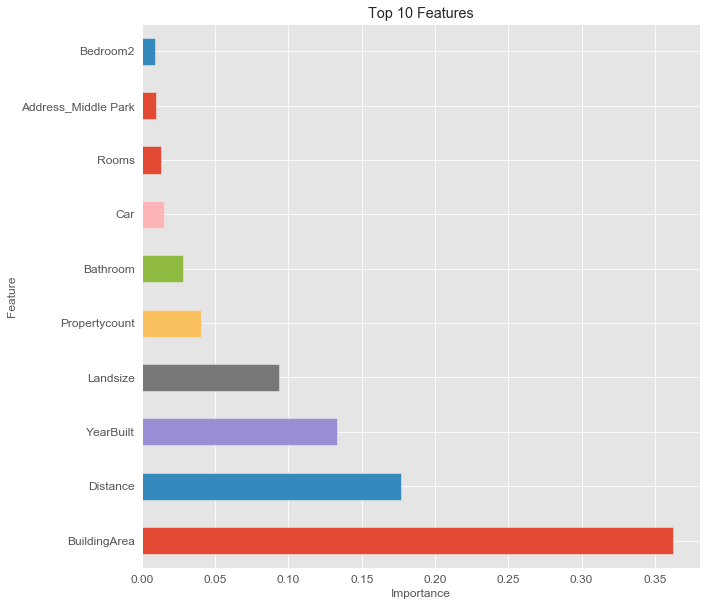

In [20]:
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))

feat_importances.nlargest(10).plot(kind='barh')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

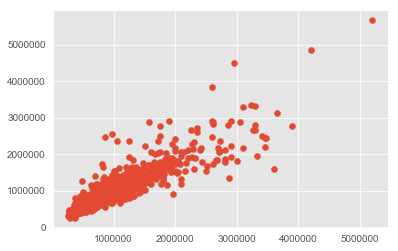

In [27]:
plt.scatter(y_test, rfr.predict(x_test))
# plt.plot(x_train, Y_pred, color='red')
plt.show()

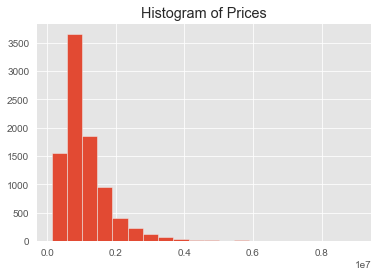

In [28]:
df1.Price.hist(bins=20)
plt.title('Histogram of Prices')
plt.show()